United Kingdom    0.124215
New Zealand       0.161422
Germany           0.191743
Thailand          0.208285
Japan             0.233079
South Korea       0.238654
France            0.253063
Canada            0.256050
Singapore         0.265707
United States     0.335590
Malaysia          0.344748
Hong Kong         0.364682
Indonesia         0.403948
China             0.491638
India             0.593924
dtype: float64


Text(0.5, 1.0, 'Forecasts total number of internatonal Tourist to Australian during 2019~2028')

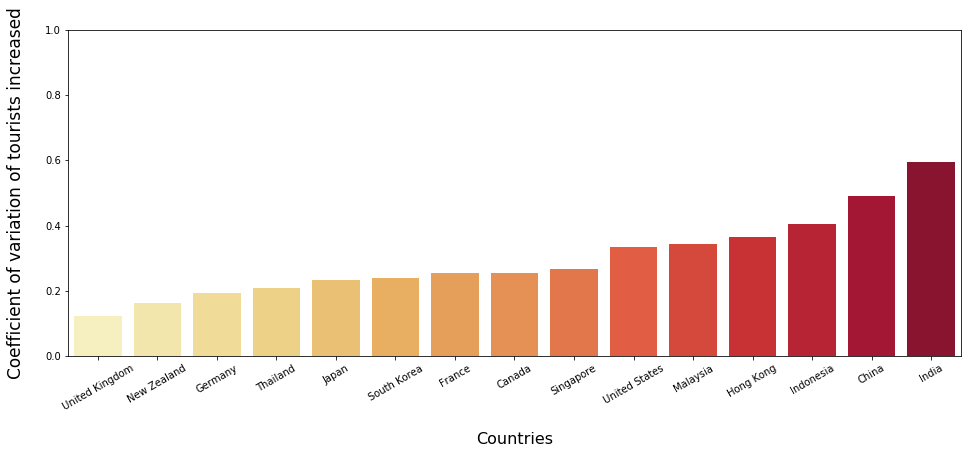

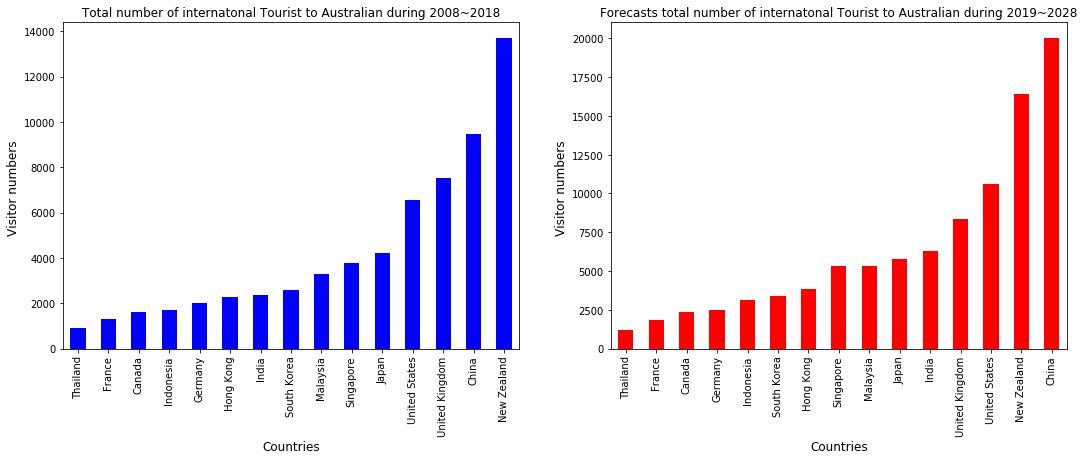

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Import dataset

df=pd.read_csv('National_Tourism_Forecasts_2019.csv',parse_dates=['Year'],index_col='Year')
df

# 2. Organize dataset
df0=df.loc[:,['China','New Zealand','United States','United Kingdom','Japan','Singapore','Malaysia','South Korea','India','Hong Kong','Indonesia','Germany','France','Canada','Thailand']]

df1=df0.truncate(before='2008-01-01', after='2018-01-01')#reall numbers of tourists during 2008 to 2018.
df2=df0.truncate(before='2019-01-01', after='2028-01-01')#forecasts numbers of tourists during 2019 to 2028.

df_total1=df1.sum()#get the total numbers of tourists during 2008 to 2018
df_sorted1=df_total1.sort_values()#sort the numbers
df_sorted1[-19:]

df_total2=df2.sum()#get the forecasts total numbers of tourists during 2019 to 2028
df_sorted2=df_total2.sort_values()#sort the numbers
df_sorted2[-19:]

# 3.Calculate coefficient of variation of tourists increased by countries

df_CV=df0.std()/df0.mean()#Calculate the coefficient of variation of tourists increased 
df_sorted=df_CV.sort_values()#sort the values to be better visual
df_sorted[-19:]
print(df_sorted[-19:])#display the coefficient of variation of tourists increased 

# 4. Plot values as a bar chart with seaborn and matplotlib 

plt.figure(figsize=(16,6))
g=sns.barplot(df_sorted[-19:].index,df_sorted[-19:],palette='YlOrRd')
g.set_xticklabels(df_sorted[-19:].index,rotation=30);
g.set_ylabel("Coefficient of variation of tourists increased",fontsize=17,labelpad=20);
g.set_xlabel("Countries",fontsize=16, labelpad=20);
g.set_ylim(0,1);# display the bar chart with seaborn

figure, axes = plt.subplots(1, 2)# display the bar chart with matplotlib 
ax1=df_sorted1[-19:].plot.bar(ax=axes[0],facecolor='blue',label='Tourists numbers',alpha=1,figsize=(18,6))
ax1.set_xlabel('Countries',fontsize=12)
ax1.set_ylabel('Visitor numbers ',fontsize=12)
ax1.set_title('Total number of internatonal Tourist to Australian during 2008~2018',fontsize=12)

ax2=df_sorted2[-159:].plot.bar(ax=axes[1],facecolor='r',label='Tourists numbers',alpha=1,figsize=(18,6))
ax2.set_xlabel('Countries',fontsize=12)
ax2.set_ylabel('Visitor numbers ',fontsize=12)
ax2.set_title('Forecasts total number of internatonal Tourist to Australian during 2019~2028',fontsize=12)